In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.preprocess import *
from utils.model import *

# Read data

In [2]:
y = read_target_train()

# Preprocess data

In [3]:
X, X_test = read_preprocessed_data()

In [4]:
# X.select_dtypes(['bool'])
len(get_cat_features_list(X_test))

29

# Train catboost

In [5]:
from catboost import CatBoostRegressor

In [6]:
get_cat_features_list(X)

['Завалка лома_gr',
 'Заливка чугуна_gr',
 'Продувка_gr',
 'Наведение гарнисажа_gr',
 'Осмотр конвертера_gr',
 'Отсутствие чугуна_gr',
 'Обрыв горловины_gr',
 'Наложение продувки_gr',
 'Вхождение в гр.МНЛЗ_gr',
 'Полусухое торкрет._gr',
 'Отсутствие O2_gr',
 'Неиспр. электр. обор_gr',
 'Подварка  футеровки_gr',
 'Ожидание стальковша_gr',
 'Замер положения фурм_gr',
 'Неиспр. механ. обор._gr',
 'Отсутствие мет.шихты_gr',
 'Замена фурмы_gr',
 'ППР_gr',
 'Ожидание шл.чаш_gr',
 'Отсут. своб.разл.пл._gr',
 'Ремонт летки_gr',
 'Неиспр. энерг. обор_gr',
 'Неиспр. АСУ и КИПиА_gr',
 'plavka_NMZ',
 'plavka_NAPR_ZAD',
 'plavka_TIPE_FUR',
 'plavka_TIPE_GOL',
 'cluster_label']

In [15]:
model_tst = CatBoostRegressor(iterations = 2000, verbose = 100, random_state = config['random_state'], cat_features=get_cat_features_list(X))
model_C = CatBoostRegressor(iterations = 2000, verbose = 100, random_state = config['random_state'], cat_features=get_cat_features_list(X))

In [16]:
model_tst.fit(X, y['TST'])

Learning rate set to 0.026218
0:	learn: 30.3854857	total: 126ms	remaining: 4m 11s
100:	learn: 20.9545127	total: 6.48s	remaining: 2m 1s
200:	learn: 18.4347926	total: 12.8s	remaining: 1m 54s
300:	learn: 16.6178109	total: 19.2s	remaining: 1m 48s
400:	learn: 14.8578484	total: 25.5s	remaining: 1m 41s
500:	learn: 13.4089619	total: 31.9s	remaining: 1m 35s
600:	learn: 12.1874441	total: 38.4s	remaining: 1m 29s
700:	learn: 11.1171931	total: 44.7s	remaining: 1m 22s
800:	learn: 10.2112550	total: 51.1s	remaining: 1m 16s
900:	learn: 9.3588059	total: 57.5s	remaining: 1m 10s
1000:	learn: 8.6358611	total: 1m 3s	remaining: 1m 3s
1100:	learn: 7.9611560	total: 1m 10s	remaining: 57.3s
1200:	learn: 7.3584721	total: 1m 16s	remaining: 50.9s
1300:	learn: 6.7847651	total: 1m 22s	remaining: 44.5s
1400:	learn: 6.2610040	total: 1m 29s	remaining: 38.2s
1500:	learn: 5.7711451	total: 1m 35s	remaining: 31.8s
1600:	learn: 5.3295377	total: 1m 42s	remaining: 25.5s
1700:	learn: 4.9291995	total: 1m 48s	remaining: 19.1s
180

In [17]:
model_C.fit(X, y['C'])

Learning rate set to 0.026218
0:	learn: 0.0990916	total: 64.3ms	remaining: 2m 8s
100:	learn: 0.0440354	total: 6.4s	remaining: 2m
200:	learn: 0.0317651	total: 12.7s	remaining: 1m 53s
300:	learn: 0.0264121	total: 19.1s	remaining: 1m 47s
400:	learn: 0.0224934	total: 25.5s	remaining: 1m 41s
500:	learn: 0.0200877	total: 31.8s	remaining: 1m 35s
600:	learn: 0.0181873	total: 38.1s	remaining: 1m 28s
700:	learn: 0.0165398	total: 44.4s	remaining: 1m 22s
800:	learn: 0.0151076	total: 50.7s	remaining: 1m 15s
900:	learn: 0.0137211	total: 57.1s	remaining: 1m 9s
1000:	learn: 0.0125233	total: 1m 3s	remaining: 1m 3s
1100:	learn: 0.0114999	total: 1m 9s	remaining: 57s
1200:	learn: 0.0105371	total: 1m 16s	remaining: 50.7s
1300:	learn: 0.0096792	total: 1m 22s	remaining: 44.3s
1400:	learn: 0.0088756	total: 1m 28s	remaining: 38s
1500:	learn: 0.0081823	total: 1m 35s	remaining: 31.7s
1600:	learn: 0.0075238	total: 1m 41s	remaining: 25.3s
1700:	learn: 0.0069678	total: 1m 48s	remaining: 19s
1800:	learn: 0.0064223	t

In [ ]:
# X_T_copy = X.copy()
# X_T_copy['TST'] = model_tst.predict(X)

In [18]:
save_catboost_models(model_tst, model_C)

<BarContainer object of 15 artists>

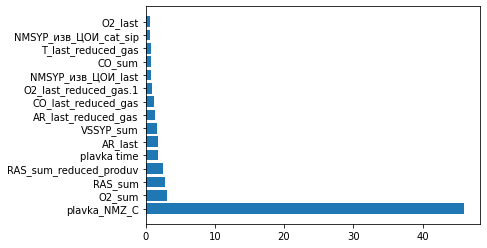

In [19]:
args = model_C.feature_importances_.argsort()[::-1][:15]
plt.barh(np.array(model_C.feature_names_)[args], model_C.feature_importances_[args]) 


In [36]:
set(X_test['plavka_NMZ'].values)

{'08YU.z02/ЭТ    ',
 '09Г2С          ',
 '09Г2С.16       ',
 '20             ',
 '25Г2С          ',
 '28С            ',
 '28С.2          ',
 '35ГС           ',
 '3SP.z23/ЭТ     ',
 '3SP.z24/ЭТ     ',
 '4SP.z08/ЭТ     ',
 '5SP.z24/ЭТ     ',
 'C071TM.z01/ЭТ  ',
 'C091TM.z01/ЭТ  ',
 'C121TM/ЭТ      ',
 'GR60.z06/ЭТ    ',
 'SC2/ЭТ         ',
 'SC2M/ЭТ        ',
 'СТ3ГПС.8       ',
 'СТ3ГСП.2       ',
 'СТ3ГСП.4       ',
 'СТ3ПС.6        ',
 'СТ3ПС.7        ',
 'Ст1кп          ',
 'Ст1пс          ',
 'Ст1пс.z05/ЭТ   ',
 'Ст2пс          ',
 'Ст3Гпс         ',
 'Ст3пс          ',
 'Ст3пс/Э        ',
 'Ст3сп          ',
 'Ст3сп/Т        ',
 'Ст3сп/Э        ',
 'Ст3сп/ЭТ       ',
 'Ст4сп          ',
 'Ст4сп/ЭТ       ',
 'Ст5сп          ',
 'Ш2.1           ',
 'Ш2.3           '}